In [1]:
import pandas as pd

results = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/all_model_results.csv")

results

,Model,RMSE,MAE,R2
0,Linear Regression,6.464955,4.676330,0.705656
1,Ridge Regression,6.464955,4.676330,0.705656
2,Lasso Regression,6.464970,4.676325,0.705655
3,Decision Tree,3.440568,1.755422,0.916635
4,Random Forest,3.412669,1.379909,0.917981
5,Gradient Boosting,2.935980,1.450630,0.939294


In [2]:
results.to_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/tables/results.csv", index=False)


In [3]:
y_test = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/y_test_values.csv")
y_pred_gbr = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/y_pred_gbr_values.csv")
rf_importance = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/rf_feature_importances.csv")
mda_importance = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/mda_feature_importances.csv")
coef_df = pd.read_csv("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/misc_datas/linear_regression_coefficients.csv")

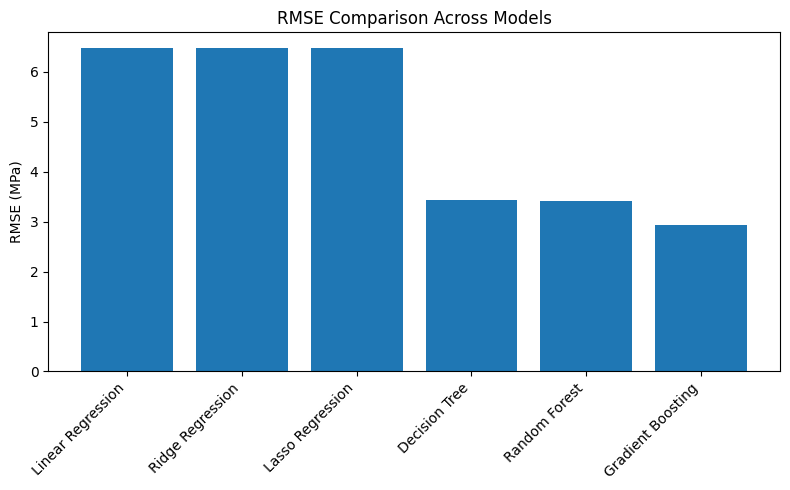

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["RMSE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE (MPa)")
plt.title("RMSE Comparison Across Models")
plt.tight_layout()
plt.savefig("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/figures/rmse_comparison.png", dpi=300)
plt.show()


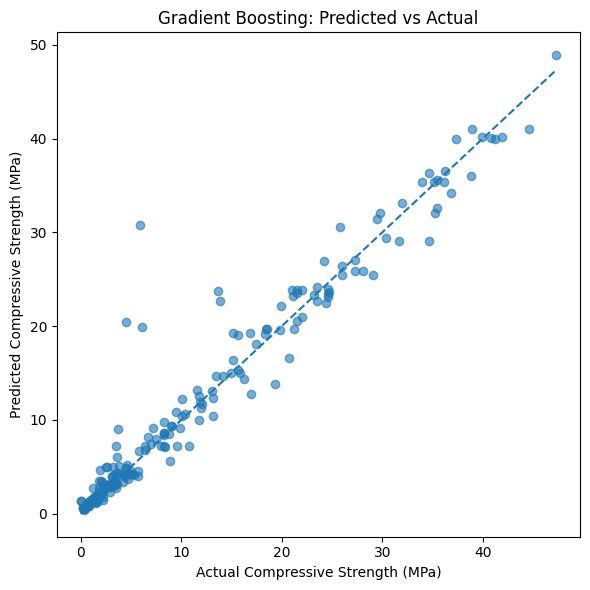

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Gradient Boosting: Predicted vs Actual")
plt.tight_layout()
plt.savefig("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/figures/predicted_vs_actual_gbr.png", dpi=300)
plt.show()


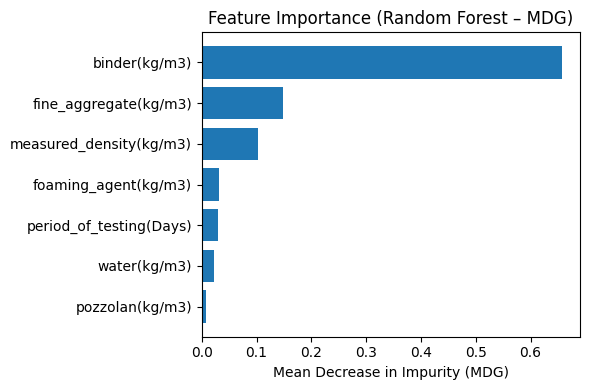

In [8]:
rf_importance = rf_importance.sort_values("MDG")

plt.figure(figsize=(6, 4))
plt.barh(rf_importance["Feature"], rf_importance["MDG"])
plt.xlabel("Mean Decrease in Impurity (MDG)")
plt.title("Feature Importance (Random Forest – MDG)")
plt.tight_layout()
plt.savefig("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/figures/rf_mdg_importance.png", dpi=300)
plt.show()


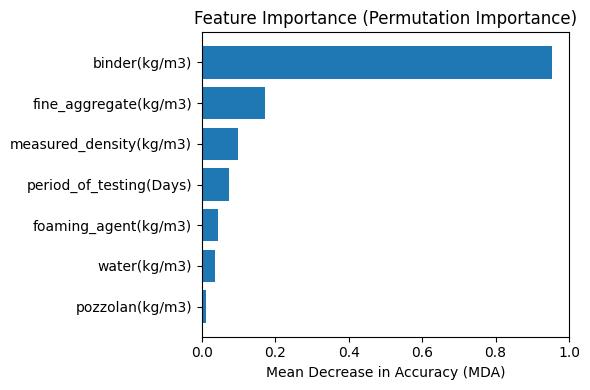

In [9]:
mda_importance = mda_importance.sort_values("MDA")

plt.figure(figsize=(6, 4))
plt.barh(mda_importance["Feature"], mda_importance["MDA"])
plt.xlabel("Mean Decrease in Accuracy (MDA)")
plt.title("Feature Importance (Permutation Importance)")
plt.tight_layout()
plt.savefig("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/figures/rf_mda_importance.png", dpi=300)
plt.show()


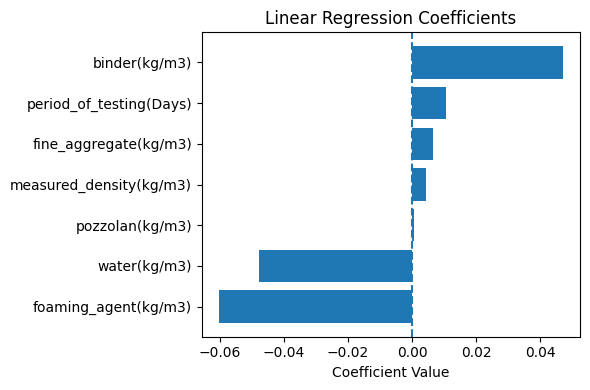

In [10]:
coef_df = coef_df.sort_values("Coefficient")

plt.figure(figsize=(6, 4))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(0, linestyle="--")
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.savefig("/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/figures/linear_coefficients.png", dpi=300)
plt.show()
